<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-02-25-DBSCAN/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

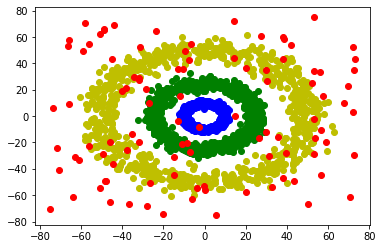

In [28]:
def circle():
    X, y = make_circles(noise = 0.1, factor = 0.3, n_samples = 1500)
    X = X[ y==0]
    y = y[y==0]
    return X, y

X1, y1 = circle()
X2, y2 = circle()
X3, y3 = circle()
n1 = np.random.rand(100, 2)*150 - 75
# n2 = np.random.rand(100)*150 - 75

X1 *= 10
X2 *= 25
X3 *= 50

plt.scatter(X1[:, 0], X1[:, 1], color = 'b')
plt.scatter(X2[:, 0], X2[:, 1], color = 'g')
plt.scatter(X3[:, 0], X3[:, 1], color = 'y')
plt.scatter(n1[:, 0], n1[:, 1], color = 'r')

In [31]:
X = np.vstack([X1, X2, X3, n1])

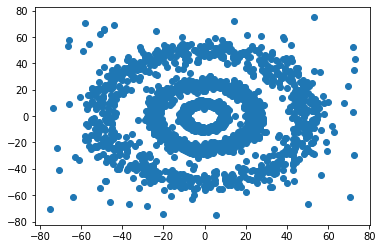

In [32]:
plt.scatter(X[:, 0], X[:, 1])

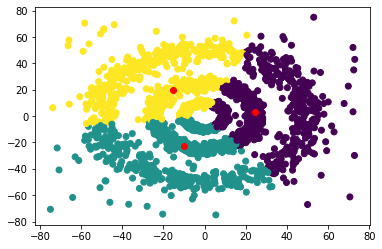

In [36]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(X)
plt.scatter(X[:, 0], X[:, 1], c = km.predict(X))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = 'red')

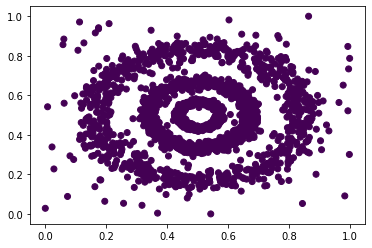

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=5)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)
# plt.scatter(db.components_[:, 0], db.components_[:,1], color = 'red')

In [69]:
np.unique(y_pred)

array([0])

In [70]:
from sklearn.metrics import silhouette_score

for ep in np.linspace(0.1, 1, 10):
    for ms in np.linspace(1, 10, 10):
        db = DBSCAN(eps=0.5, min_samples=5)
        y_pred = db.fit_predict(scaled)
        
        ncls = np.unique(y_pred).size
        if ncls>1:
            score = silhouette_score(scaled, y_pred)
            print(ep, ms, score)

In [80]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=8)
nn.fit(scaled)

NearestNeighbors(n_neighbors=8)

In [81]:
distance, index =  nn.kneighbors(scaled)
distance

array([[0.        , 0.00147006, 0.00237414, ..., 0.00399866, 0.00460103,
        0.00472664],
       [0.        , 0.00479908, 0.00567367, ..., 0.00842698, 0.00852599,
        0.00893239],
       [0.        , 0.00435272, 0.00694039, ..., 0.01054392, 0.01137883,
        0.01191522],
       ...,
       [0.        , 0.01200255, 0.01553892, ..., 0.02666956, 0.0298868 ,
        0.03015366],
       [0.        , 0.0087711 , 0.01928091, ..., 0.02760529, 0.03000771,
        0.03503526],
       [0.        , 0.00364724, 0.00458874, ..., 0.01072097, 0.01113135,
        0.01334239]])

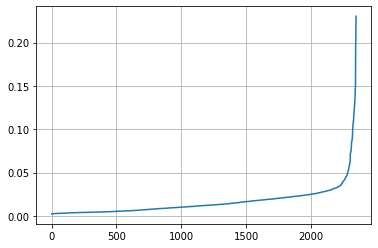

In [87]:
dis = distance[:, 5]
dis.sort()
plt.grid()
plt.plot(dis)

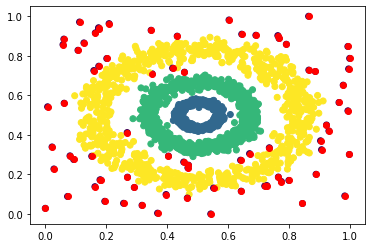

In [101]:
db = DBSCAN(eps=0.03, min_samples=5)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)

plt.scatter(scaled[ y_pred==-1, 0], scaled[y_pred==-1, 1], color = 'r')

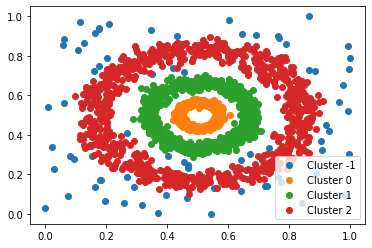

In [106]:
for i in [-1, 0, 1, 2]:
    plt.scatter(scaled[ y_pred==i, 0], scaled[y_pred==i, 1], label = 'Cluster {}'.format(i))

plt.legend()

In [98]:
from sklearn.metrics import silhouette_score

for ep in np.linspace(0.01, 0.05, 5):
    for ms in np.linspace(3, 7, 4):
        db = DBSCAN(eps=ep, min_samples=ms)
        y_pred = db.fit_predict(scaled)
        
        ncls = np.unique(y_pred).size
        if ncls>1:
            score = silhouette_score(scaled, y_pred)
            print(score, ep, ms )

-0.1339347806143145 0.01 3.0
-0.22808954609013987 0.01 4.333333333333333
-0.2388561593630075 0.01 5.666666666666666
-0.27395933587201227 0.01 7.0
0.04393016347375087 0.02 3.0
0.05231508177149372 0.02 4.333333333333333
0.02112618500311149 0.02 5.666666666666666
-0.01984016847803777 0.02 7.0
-0.07039045712440321 0.03 3.0
0.022378577414543348 0.03 4.333333333333333
0.022025799089285918 0.03 5.666666666666666
0.1427635714730564 0.03 7.0
-0.07613419470884296 0.04 3.0
0.454140279827145 0.04 4.333333333333333
0.2750282744187388 0.04 5.666666666666666
0.2750282744187388 0.04 7.0
0.18489448557215102 0.05 3.0
0.4744418944778293 0.05 4.333333333333333
0.4744418944778293 0.05 5.666666666666666
0.4744418944778293 0.05 7.0


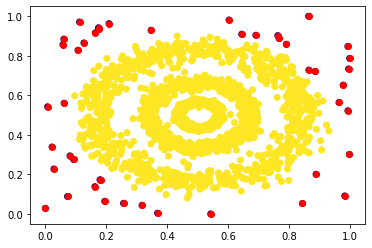

In [100]:
db = DBSCAN(eps=0.05, min_samples=5)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)

plt.scatter(scaled[ y_pred==-1, 0], scaled[y_pred==-1, 1], color = 'r')

**https://raw.githubusercontent.com/Pepcoders/Pepcoding-Data-Science/main/dataset/CC%20GENERAL.csv**